In [1]:
import git_access
import json
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx
import os

In [17]:
access_token = '**'
repo_owner = 'rspec'
source_type = 'github_repo'
git_url = 'git://github.com/rspec/rspec-rails.git'
api_base_url = 'http://api.github.com'
repo_name = 'rspec-rails'
url_type = 'issues'
url_details = 'comments'
client = git_access.GitHubClient({'access_token': access_token,
                       'repo_owner': repo_owner, 
                       'source_type': source_type, 
                       'git_url': git_url, 
                       'api_base_url': api_base_url, 
                       'repo_name': repo_name}) 
base_url = api_base_url + '/repos/' + repo_owner + '/' + repo_name + '/' + url_type
advanced_url = base_url + '/' + url_details
x = [0]*100
check = 1
page_number = 1
comments_details = []
while len(x) >= 100:
    check -= 1
    paged_url = advanced_url + '?page=' + str(page_number) + '&per_page=100'
    page_number += 1
    print(paged_url)
    res = client.get(paged_url)
    x = json.loads(res.content)
    for i in range(len(x)):
        issue_number = x[i]['issue_url'][len(base_url)+2:]
        user_logon = x[i]['user']['login']
        author_association = x[i]['author_association']
        comments_details.append([issue_number,user_logon,author_association])

In [5]:
x = [0]*100
check = 1
page_number = 1
issue_details = []
while len(x) >= 100:
    check -= 1
    paged_url = base_url + '?state=' + 'all' + '&page=' + str(page_number) + '&per_page=100'
    page_number += 1
    print(paged_url)
    res = client.get(paged_url)
    x = json.loads(res.content)
    for i in range(len(x)):
        issue_number = x[i]['number']
        user_logon = x[i]['user']['login']
        author_type = x[i]['user']['type']
        issue_details.append([issue_number,user_logon,author_type])

http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=1&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=2&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=3&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=4&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=5&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=6&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=7&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=8&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=9&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=10&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=11&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=12&per_page=100
h

In [2]:
comments_details_df = pd.read_pickle(os.getcwd() + '\\data\\rspec-rails_issue_comment.pkl')
issue_details_df = pd.read_pickle(os.getcwd() + '\\data\\rspec-rails_issue.pkl')

In [6]:
comments_details_df = pd.DataFrame(comments_details, columns = ['Issue_id','user_logon','commenter_type'])
issue_details_df = pd.DataFrame(issue_details, columns = ['Issue_id','user_logon','commenter_type'])

In [3]:
comments_details_df.drop(['commenter_type'], inplace=True, axis = 1)
issue_details_df.drop(['author_type','Desc','title','commits'], inplace=True, axis = 1)

In [4]:
comm_details_df = pd.concat([comments_details_df,issue_details_df])

In [5]:
uniq_issues = comm_details_df.Issue_id.unique()
uniq_users = comm_details_df.user_logon.unique()
connection_matrix = np.ndarray(shape=(len(uniq_users),len(uniq_users)))
connection_matrix = np.zeros((len(uniq_users),len(uniq_users)), dtype=np.int)
user_dict = {}
rev_user_dict = {}
user_id = 0
for i in range(len(uniq_users)):
    user_dict[uniq_users[i]] = user_id
    rev_user_dict[user_id] = uniq_users[i]
    user_id += 1
for i in uniq_issues:
    issue_specific = comm_details_df[comm_details_df['Issue_id'] == i]
    participents = issue_specific.user_logon.unique()
    for j in range(len(participents)):
        comment_from = participents[j]
        comment_count = issue_specific[issue_specific['user_logon'] == comment_from].shape
        if len(participents) == 1:
            continue
        comment_to = np.delete(participents,np.where(participents == comment_from))
        for k in comment_to:
            connection_matrix[user_dict[comment_from]][user_dict[k]] += len(comment_count)

In [6]:
%matplotlib inline
def show_graph_with_labels(matrix):
    gr = nx.Graph()
    rows,cols = np.where(matrix > 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    #plt.figure(num=None, figsize = (100,100), dpi = 50, facecolor='w', edgecolor='k')
    #nx.draw(gr, node_size=500)
    #plt.show()
    return gr.degree(gr.nodes()),gr

In [7]:
degree, G = show_graph_with_labels(connection_matrix)

In [8]:
x = list(degree.values())
x.sort()
x = np.log(x)

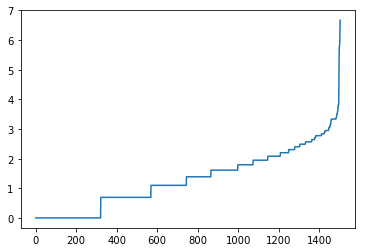

In [9]:
plt.plot(x)

In [10]:
len(comments_details)

NameError: name 'comments_details' is not defined

In [11]:
uniq_users

array(['kristianmandrup', 'mbj', 'dchelimsky', ..., 'biilmann', 'wout',
       'rspec'], dtype=object)

In [27]:
url_type = 'users'
base_url = api_base_url + '/' + url_type
advanced_url = base_url
user_mapping = []
check = 1
page_number = 1
for user in uniq_users:
    check -= 1
    paged_url = advanced_url + '/' + user
    page_number += 1
    print(paged_url)
    res = client.get(paged_url)
    x = json.loads(res.content)
    user_name = x['name']
    user_logon = x['login']
    user_mapping.append([user_name,user_logon])

http://api.github.com/users/kristianmandrup
http://api.github.com/users/mbj
http://api.github.com/users/dchelimsky
http://api.github.com/users/tmilker
http://api.github.com/users/dmathieu
http://api.github.com/users/veezus
http://api.github.com/users/ethangunderson
http://api.github.com/users/novroy
http://api.github.com/users/yzhrain
http://api.github.com/users/jbpros
http://api.github.com/users/cgs
http://api.github.com/users/chrisconley
http://api.github.com/users/keeran
http://api.github.com/users/Houdini
http://api.github.com/users/spicycode
http://api.github.com/users/nclark
http://api.github.com/users/vojto
http://api.github.com/users/levifig
http://api.github.com/users/enricob
http://api.github.com/users/phs
http://api.github.com/users/epitron
http://api.github.com/users/juvenn
http://api.github.com/users/tibastral
http://api.github.com/users/iain
http://api.github.com/users/alfanick
http://api.github.com/users/dbackeus
http://api.github.com/users/kangster
http://api.github.com

KeyboardInterrupt: 

In [18]:
user_mapping

[['Kristian Mandrup', 'kristianmandrup'],
 ['Markus Schirp', 'mbj'],
 ['David Chelimsky', 'dchelimsky'],
 [None, 'tmilker'],
 ['Damien Mathieu', 'dmathieu'],
 ['Veezus Kreist', 'veezus'],
 ['Ethan Gunderson', 'ethangunderson'],
 [None, 'novroy'],
 ['Rain Yang', 'yzhrain'],
 ['Julien Biezemans', 'jbpros'],
 ['Chris Sepic', 'cgs'],
 [None, 'chrisconley'],
 ['Keeran Raj Hawoldar', 'keeran'],
 ['Dmitrii Golub', 'Houdini'],
 ['Chad Humphries', 'spicycode'],
 ['Neal Clark', 'nclark'],
 ['Vojtech Rinik', 'vojto'],
 ['Levi Figueira', 'levifig'],
 ['Enrico Bianco', 'enricob'],
 ['Phil Smith', 'phs'],
 ['Chris Gahan', 'epitron'],
 ['Juvenn Woo', 'juvenn'],
 ['Thibaut Assus', 'tibastral'],
 ['iain', 'iain'],
 ['Amadeusz Leonardo Juskowiak', 'alfanick'],
 ['David Backeus', 'dbackeus'],
 [None, 'kangster'],
 ['Joost Baaij', 'tilsammans'],
 ['rubiii', 'rubiii'],
 [None, 'petRUShka'],
 ['Marcin Kulik', 'sickill'],
 ['Sven Riedel', 'sriedel'],
 ['David Wilkie', 'dwilkie'],
 ['Louis Taylor', 'negonicra

In [19]:
user_dict

{'kristianmandrup': 0,
 'mbj': 1,
 'dchelimsky': 2,
 'tmilker': 3,
 'dmathieu': 4,
 'veezus': 5,
 'ethangunderson': 6,
 'novroy': 7,
 'yzhrain': 8,
 'jbpros': 9,
 'cgs': 10,
 'chrisconley': 11,
 'keeran': 12,
 'Houdini': 13,
 'spicycode': 14,
 'nclark': 15,
 'vojto': 16,
 'levifig': 17,
 'enricob': 18,
 'phs': 19,
 'epitron': 20,
 'juvenn': 21,
 'tibastral': 22,
 'iain': 23,
 'alfanick': 24,
 'dbackeus': 25,
 'kangster': 26,
 'tilsammans': 27,
 'rubiii': 28,
 'petRUShka': 29,
 'sickill': 30,
 'sriedel': 31,
 'dwilkie': 32,
 'negonicrac': 33,
 'kidpollo': 34,
 'hasimo': 35,
 'CoralineAda': 36,
 'jmccaffrey': 37,
 'markbates': 38,
 'rrouse': 39,
 'mooman': 40,
 'wjessop': 41,
 'benpickles': 42,
 'simon-nicholls': 43,
 'TMaYaD': 44,
 'radar': 45,
 'samflores': 46,
 'alexcrichton': 47,
 'simonbennett': 48,
 'hosh': 49,
 'thibaudgg': 50,
 'mackuba': 51,
 'jfturcot': 52,
 'wincent': 53,
 'hiroshi': 54,
 'markiz': 55,
 'bdimcheff': 56,
 'phillipkoebbe': 57,
 'frankjmattia': 58,
 'mhfs': 59,
 

In [20]:
degree

{0: 3,
 2: 559,
 5: 3,
 25: 3,
 1: 1,
 3: 3,
 4: 16,
 6: 3,
 7: 1,
 8: 3,
 9: 7,
 10: 2,
 11: 6,
 12: 9,
 13: 6,
 14: 2,
 15: 1,
 16: 1,
 17: 3,
 18: 2,
 19: 2,
 20: 1,
 21: 6,
 22: 6,
 23: 4,
 24: 2,
 26: 1,
 27: 1,
 28: 2,
 29: 5,
 30: 6,
 31: 6,
 32: 2,
 33: 3,
 34: 1,
 35: 2,
 37: 2,
 38: 2,
 39: 3,
 40: 5,
 41: 5,
 42: 4,
 43: 2,
 44: 2,
 45: 11,
 46: 1,
 47: 6,
 48: 2,
 49: 5,
 50: 6,
 51: 1,
 52: 2,
 53: 12,
 54: 2,
 55: 13,
 56: 2,
 57: 5,
 58: 5,
 59: 3,
 60: 1,
 61: 5,
 62: 5,
 63: 1,
 64: 5,
 65: 1,
 66: 5,
 67: 6,
 68: 1,
 69: 3,
 70: 5,
 71: 2,
 72: 1,
 73: 1,
 74: 8,
 75: 3,
 76: 6,
 77: 2,
 79: 1,
 80: 5,
 81: 2,
 82: 1,
 83: 2,
 84: 4,
 85: 14,
 86: 9,
 87: 128,
 88: 18,
 89: 5,
 90: 4,
 91: 8,
 92: 3,
 93: 1,
 94: 5,
 95: 8,
 96: 8,
 97: 14,
 98: 8,
 99: 5,
 100: 5,
 102: 2,
 103: 4,
 104: 2,
 105: 1,
 106: 4,
 107: 16,
 108: 14,
 109: 17,
 110: 1,
 111: 4,
 112: 14,
 113: 3,
 114: 21,
 115: 20,
 116: 5,
 117: 1,
 118: 1,
 119: 1,
 120: 2,
 121: 1,
 122: 14,
 123: 1,
 

In [22]:
user_degree = {}
for i in range(len(user_mapping)):
    logon  = user_mapping[i][1]
    user_name = user_mapping[i][0]
    user_id = user_dict[logon]
    if user_id not in degree.keys():
        continue
    user_degree[user_name] = degree[user_id]

In [23]:
user_degree

{'Kristian Mandrup': 3,
 'Markus Schirp': 1,
 'David Chelimsky': 559,
 None: 1,
 'Damien Mathieu': 16,
 'Veezus Kreist': 3,
 'Ethan Gunderson': 3,
 'Rain Yang': 3,
 'Julien Biezemans': 7,
 'Chris Sepic': 2,
 'Keeran Raj Hawoldar': 9,
 'Dmitrii Golub': 6,
 'Chad Humphries': 2,
 'Neal Clark': 1,
 'Vojtech Rinik': 1,
 'Levi Figueira': 3,
 'Enrico Bianco': 2,
 'Phil Smith': 2,
 'Chris Gahan': 1,
 'Juvenn Woo': 6,
 'Thibaut Assus': 6,
 'iain': 4,
 'Amadeusz Leonardo Juskowiak': 2,
 'David Backeus': 3,
 'Joost Baaij': 1,
 'rubiii': 2,
 'Marcin Kulik': 6,
 'Sven Riedel': 6,
 'David Wilkie': 2,
 'Louis Taylor': 3,
 'Francisco Viramontes': 1,
 'Tohru Hashimoto ': 2,
 'Coraline Ada Ehmke': 1,
 'John McCaffrey': 2,
 'Mark Bates': 2,
 'Robert Rouse': 3,
 'Rachot Moragraan': 5,
 'Will Jessop': 5,
 'Ben Pickles': 4,
 'Si': 2,
 'Subhash Chandra': 2,
 'Ryan Bigg': 11,
 'Samuel Flores': 1,
 'Alex Crichton': 6,
 'Simon Bennett': 2,
 'Ho-Sheng Hsiao': 5,
 'Thibaud Guillaume-Gentil': 6,
 'Kuba Suder': 1,


In [24]:
user_df = pd.DataFrame(user_mapping, columns = ['name', 'logon'])

In [26]:
user_df.values.tolist()

[['Kristian Mandrup', 'kristianmandrup'],
 ['Markus Schirp', 'mbj'],
 ['David Chelimsky', 'dchelimsky'],
 [None, 'tmilker'],
 ['Damien Mathieu', 'dmathieu'],
 ['Veezus Kreist', 'veezus'],
 ['Ethan Gunderson', 'ethangunderson'],
 [None, 'novroy'],
 ['Rain Yang', 'yzhrain'],
 ['Julien Biezemans', 'jbpros'],
 ['Chris Sepic', 'cgs'],
 [None, 'chrisconley'],
 ['Keeran Raj Hawoldar', 'keeran'],
 ['Dmitrii Golub', 'Houdini'],
 ['Chad Humphries', 'spicycode'],
 ['Neal Clark', 'nclark'],
 ['Vojtech Rinik', 'vojto'],
 ['Levi Figueira', 'levifig'],
 ['Enrico Bianco', 'enricob'],
 ['Phil Smith', 'phs'],
 ['Chris Gahan', 'epitron'],
 ['Juvenn Woo', 'juvenn'],
 ['Thibaut Assus', 'tibastral'],
 ['iain', 'iain'],
 ['Amadeusz Leonardo Juskowiak', 'alfanick'],
 ['David Backeus', 'dbackeus'],
 [None, 'kangster'],
 ['Joost Baaij', 'tilsammans'],
 ['rubiii', 'rubiii'],
 [None, 'petRUShka'],
 ['Marcin Kulik', 'sickill'],
 ['Sven Riedel', 'sriedel'],
 ['David Wilkie', 'dwilkie'],
 ['Louis Taylor', 'negonicra